 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = 'whale_returns.csv'
whale_returns = pd.read_csv(whale_returns_path, index_col="Date")
whale_returns.index = pd.to_datetime(whale_returns.index)
whale_returns = whale_returns.sort_index(ascending=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = 'algo_returns.csv'
algo_returns = pd.read_csv(algo_returns_path, index_col="Date")
algo_returns.index = pd.to_datetime(algo_returns.index)
algo_returns = algo_returns.sort_index(ascending=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = 'sp500_history.csv'
sp_500_history = pd.read_csv(sp500_history_path)
sp_500_history

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [9]:
# Check Data Types
sp_500_history.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp_500_history['Date'] = pd.to_datetime(sp_500_history['Date'])
sp_500_history['Close'] = sp_500_history['Close'].replace({'\$':""}, regex = True).astype('float')
sp_500_history = sp_500_history.set_index('Date')
sp_500_history = sp_500_history.sort_index(ascending=True)

In [11]:
# Calculate Daily Returns
sp_500_daily_returns = sp_500_history.pct_change()
sp_500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp_500_daily_returns = sp_500_daily_returns.dropna()
sp_500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_500_daily_returns.columns = ['SP500']
sp_500_daily_returns

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_returns, algo_returns, sp_500_daily_returns], axis = "columns", join = "inner")
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

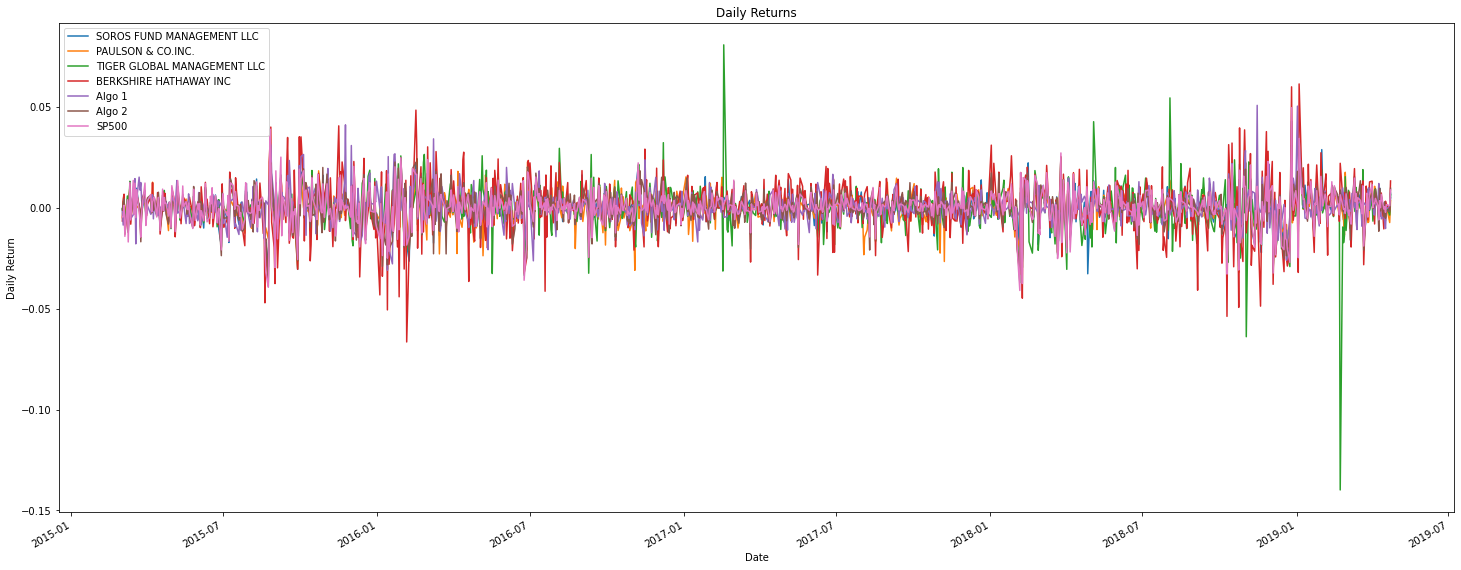

In [15]:
# Plot daily returns of all portfolios
portfolio_returns.plot(title = "Daily Returns", ylabel = "Daily Return", figsize=(25,10))

#### Calculate and Plot cumulative returns.

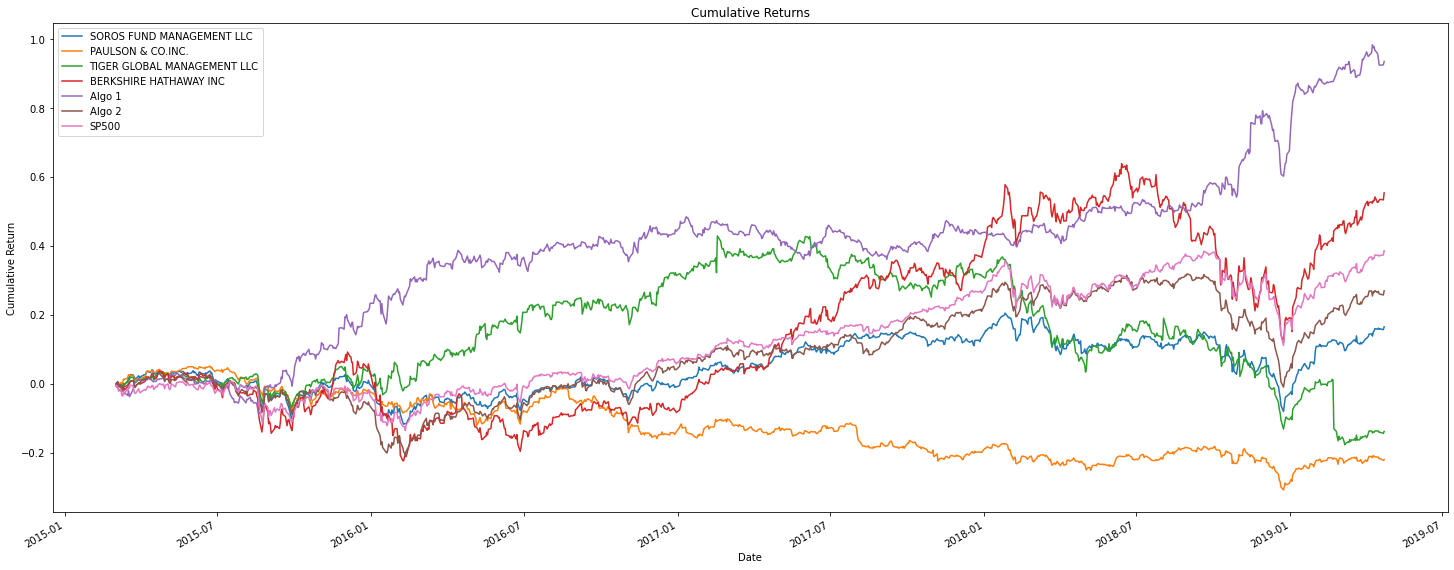

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(title = "Cumulative Returns", ylabel = "Cumulative Return", figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


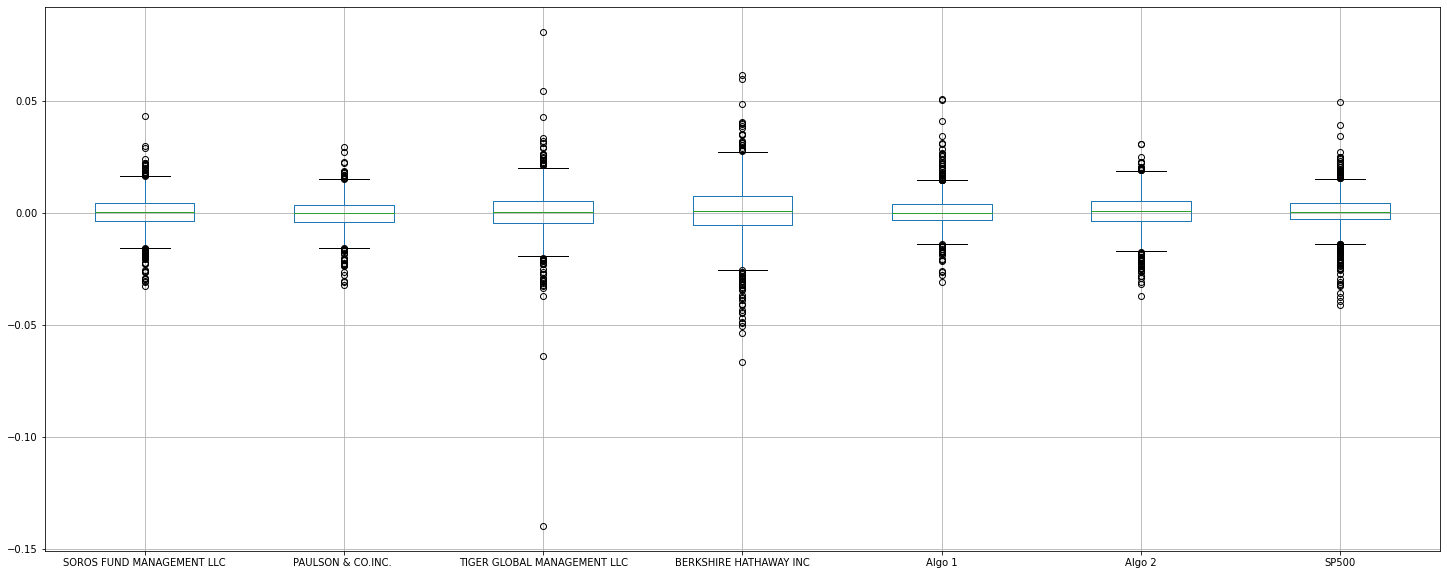

In [17]:
# Box plot to visually show risk
portfolio_returns.boxplot(figsize=(25,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
portfolio_returns.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
SP500_std = portfolio_returns.std()['SP500']

# Determine which portfolios are riskier than the S&P 500
risky_portfolio = []
for key, value in portfolio_returns.std().iteritems():
    if(value > SP500_std):
        risky_portfolio.append(key)
print(risky_portfolio)

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

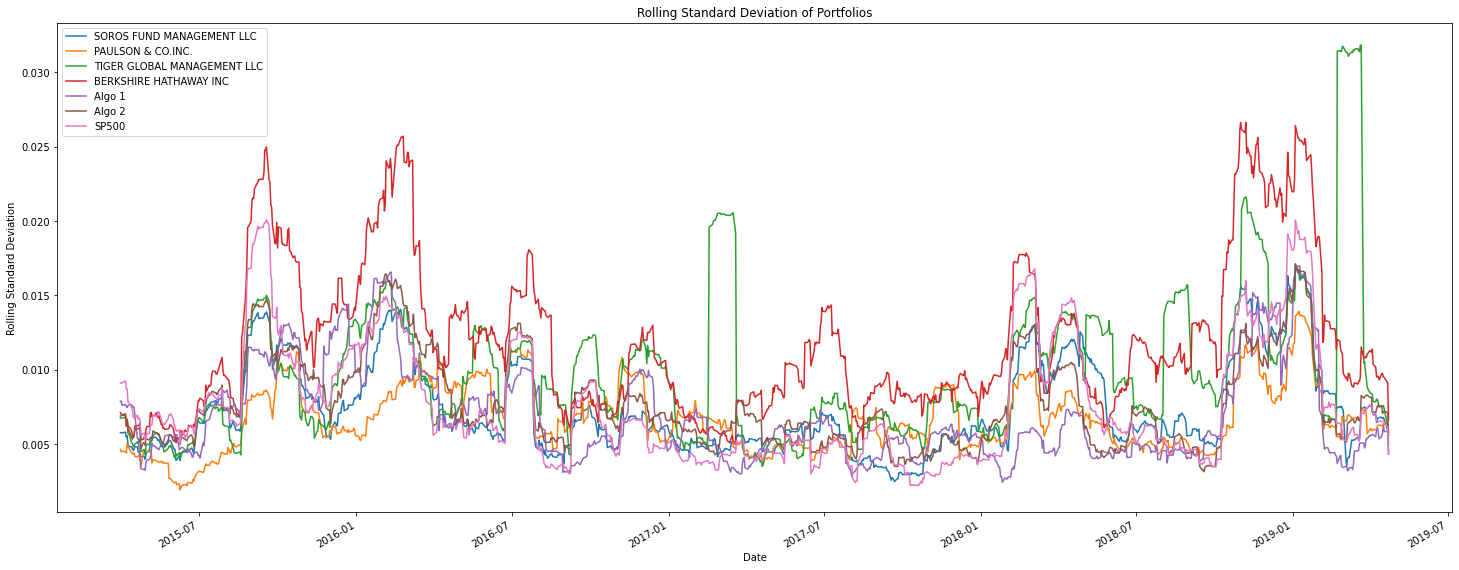

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_std.plot(title = "Rolling Standard Deviation of Portfolios", ylabel = "Rolling Standard Deviation", figsize=(25,10))

### Calculate and plot the correlation

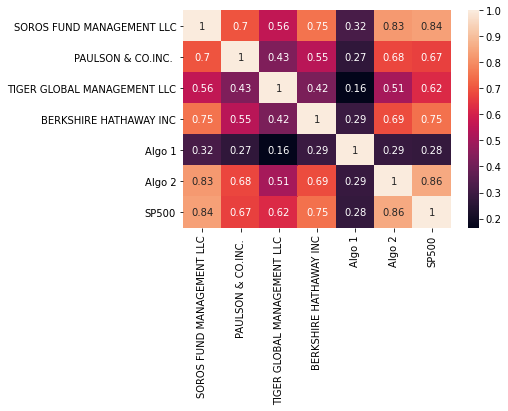

In [22]:
# Calculate the correlation
correlation = portfolio_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

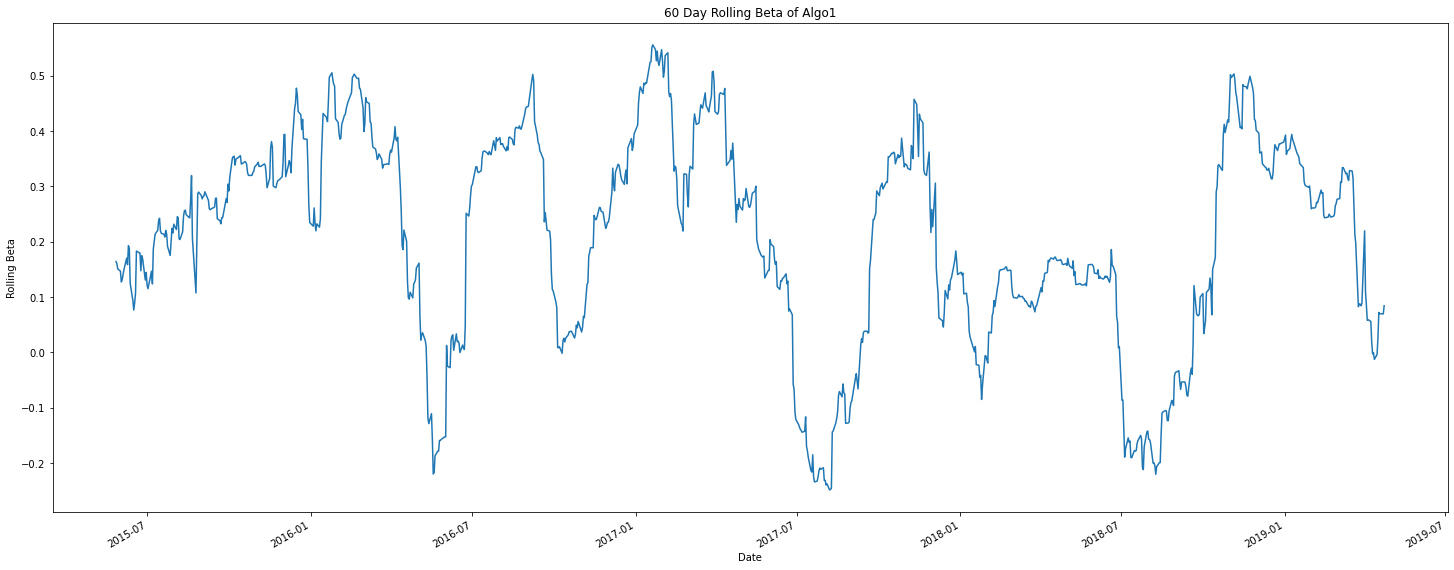

In [23]:
# Calculate covariance of a single portfolio
covariance = portfolio_returns['Algo 1'].cov(portfolio_returns['SP500'])
rolling_covariance = portfolio_returns['Algo 1'].rolling(window = 60).cov(portfolio_returns['SP500'])
# Calculate variance of S&P 500
variance = portfolio_returns['SP500'].var()
rolling_variance = portfolio_returns['SP500'].rolling(window = 60).var()
# Computing beta
algo1_beta = covariance/variance
algo1_rolling_beta = rolling_covariance/rolling_variance
# Plot beta trend

algo1_rolling_beta.plot(title = "60 Day Rolling Beta of Algo1", ylabel = "Rolling Beta", figsize=(25,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

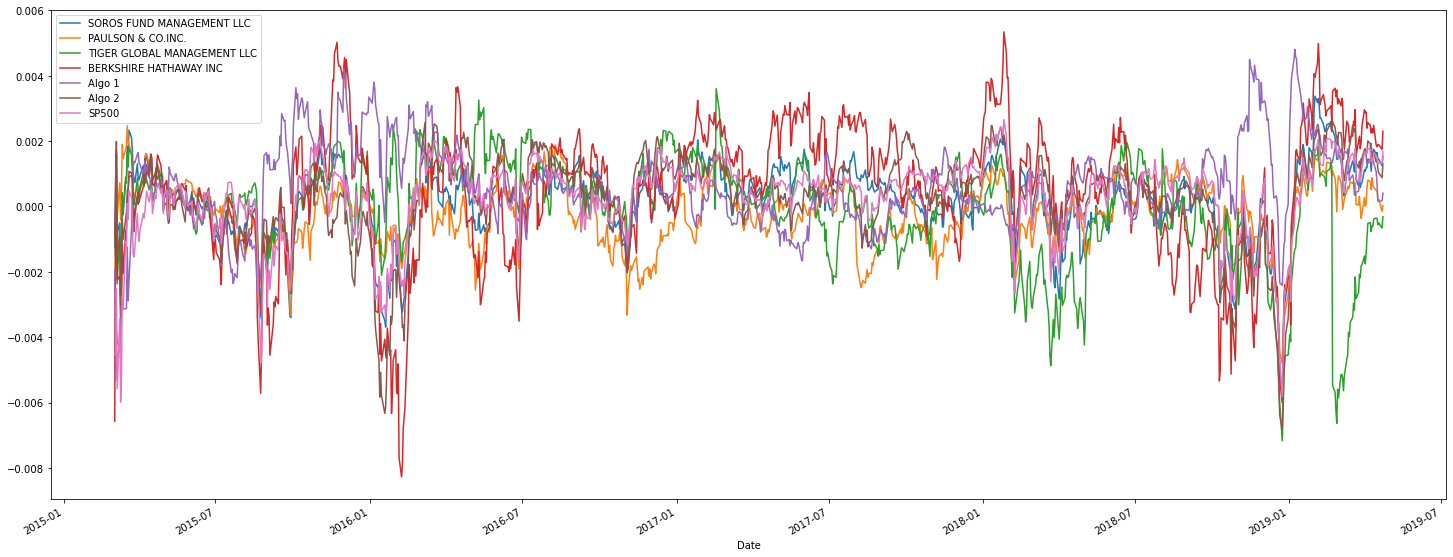

In [24]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = portfolio_returns.ewm(halflife = "21 days", times = portfolio_returns.index).mean()
portfolio_ewm.plot(figsize=(25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252)/(portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

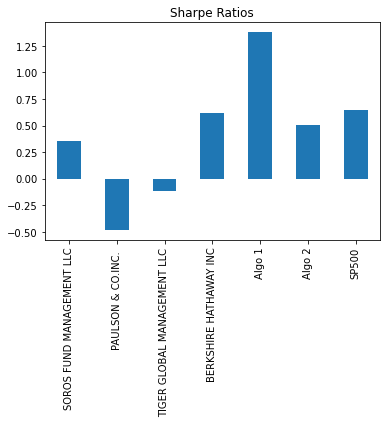

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithm 1 has the highest sharpe ratio, so it performs the best out of all the portfolios.
Algorithm 2 is outperformed by Algorithm 1, SP500 and Berkshire Hathaway Inc, but performs better than the other portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
keys_path = 'KEYS.csv'
keys_data = pd.read_csv(keys_path, index_col = "Date")
keys_data.index = pd.to_datetime(keys_data.index).date
keys_data

,Close
2015-02-01,33.42
2015-05-01,33.54
2015-06-01,33.61
2015-07-01,33.88
2015-08-01,34.12
...,...
2020-12-24,130.95
2020-12-28,131.82
2020-12-29,130.01
2020-12-30,131.24


In [28]:
# Reading data from 2nd stock
nvda_path = 'NVDA.csv'
nvda_data = pd.read_csv(nvda_path, index_col = "Date")
nvda_data.index = pd.to_datetime(nvda_data.index).date
nvda_data

,Close
2015-02-01,5.03
2015-05-01,4.95
2015-06-01,4.80
2015-07-01,4.78
2015-08-01,4.97
...,...
2020-12-24,129.94
2020-12-28,129.00
2020-12-29,129.43
2020-12-30,131.46


In [29]:
# Reading data from 3rd stock
btcusd_path = 'BTCUSD.csv'
btcusd_data = pd.read_csv(btcusd_path, index_col = "Date")
btcusd_data.index = pd.to_datetime(btcusd_data.index).date
btcusd_data

,Close
2015-11-19,326.41
2015-11-20,322.39
2015-11-21,327.00
2015-11-22,323.71
2015-11-23,323.00
...,...
2020-12-27,26258.60
2020-12-28,27038.00
2020-12-29,27394.40
2020-12-30,28897.40


In [30]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([keys_data, nvda_data, btcusd_data], axis = "columns", join = "inner")
my_portfolio

,Close,Close,Close
2015-11-19,31.13,7.78,326.41
2015-11-20,29.47,7.85,322.39
2015-11-23,30.08,7.73,323.00
2015-11-24,30.57,7.79,321.00
2015-11-25,30.60,7.78,328.98
...,...,...,...
2020-12-24,130.95,129.94,23719.40
2020-12-28,131.82,129.00,27038.00
2020-12-29,130.01,129.43,27394.40
2020-12-30,131.24,131.46,28897.40


In [31]:
# Reset Date index
my_portfolio.index.name = "Date"
my_portfolio = my_portfolio.sort_index(ascending=True)
my_portfolio

,Close,Close,Close
Date,,,
2015-01-12,29.99,8.19,362.68
2015-02-12,29.80,8.13,360.00
2015-03-12,29.05,8.11,361.77
2015-04-12,29.58,8.44,363.98
2015-07-12,29.18,8.28,394.73
...,...,...,...
2020-12-24,130.95,129.94,23719.40
2020-12-28,131.82,129.00,27038.00
2020-12-29,130.01,129.43,27394.40


In [32]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns = ["KEYS", "NVDA", "BTCUSD"]
my_portfolio

,KEYS,NVDA,BTCUSD
Date,,,
2015-01-12,29.99,8.19,362.68
2015-02-12,29.80,8.13,360.00
2015-03-12,29.05,8.11,361.77
2015-04-12,29.58,8.44,363.98
2015-07-12,29.18,8.28,394.73
...,...,...,...
2020-12-24,130.95,129.94,23719.40
2020-12-28,131.82,129.00,27038.00
2020-12-29,130.01,129.43,27394.40


In [33]:
# Calculate daily returns
my_portfolio_daily_returns = my_portfolio.pct_change()

# Drop NAs
my_portfolio_daily_returns = my_portfolio_daily_returns.dropna()
# Display sample data
my_portfolio_daily_returns.head(50)

,KEYS,NVDA,BTCUSD
Date,,,
2015-02-12,-0.006335,-0.007326,-0.007389
2015-03-12,-0.025168,-0.002460,0.004917
2015-04-12,0.018244,0.040691,0.006109
2015-07-12,-0.013523,-0.018957,0.084483
2015-08-12,0.001028,0.013285,0.061333
2015-09-12,-0.009243,-0.025030,-0.001313
2015-10-12,0.002073,0.007335,-0.006477
2015-11-12,-0.012414,-0.014563,0.089660
2015-11-19,0.086941,-0.041872,-0.279369


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_daily_returns.dot(weights)
my_portfolio_returns = my_portfolio_returns.rename("My Portfolio")
# Display sample data
my_portfolio_returns.head()

Date
2015-02-12   -0.007017
2015-03-12   -0.007570
2015-04-12    0.021681
2015-07-12    0.017334
2015-08-12    0.025215
Name: My Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([portfolio_returns, my_portfolio_returns], axis = "columns", join = "inner")
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601,-0.007570
2015-08-12,0.000000,0.000000,0.000000,0.000000,0.003026,0.002437,0.000950,0.025215
2015-10-12,-0.002263,-0.002414,0.002225,0.003727,0.010231,-0.001806,0.001276,0.000977
2015-11-12,0.000000,0.000000,0.000000,0.000000,0.002787,-0.016439,-0.013990,0.020894
2015-11-19,-0.003442,-0.004861,0.006746,0.003206,-0.002795,-0.002849,-0.001123,-0.078100
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.013583
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.008390
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.007633


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns = all_portfolio_returns.dropna()
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601,-0.007570
2015-08-12,0.000000,0.000000,0.000000,0.000000,0.003026,0.002437,0.000950,0.025215
2015-10-12,-0.002263,-0.002414,0.002225,0.003727,0.010231,-0.001806,0.001276,0.000977
2015-11-12,0.000000,0.000000,0.000000,0.000000,0.002787,-0.016439,-0.013990,0.020894
2015-11-19,-0.003442,-0.004861,0.006746,0.003206,-0.002795,-0.002849,-0.001123,-0.078100
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.013583
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.008390
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.007633


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
annualized_std2 = all_portfolio_returns.std() * np.sqrt(252)
annualized_std2

SOROS FUND MANAGEMENT LLC      0.126942
PAULSON & CO.INC.              0.114184
TIGER GLOBAL MANAGEMENT LLC    0.183687
BERKSHIRE HATHAWAY INC         0.208116
Algo 1                         0.119508
Algo 2                         0.132543
SP500                          0.131932
My Portfolio                   2.182377
dtype: float64

### Calculate and plot rolling `std` with 21-day window

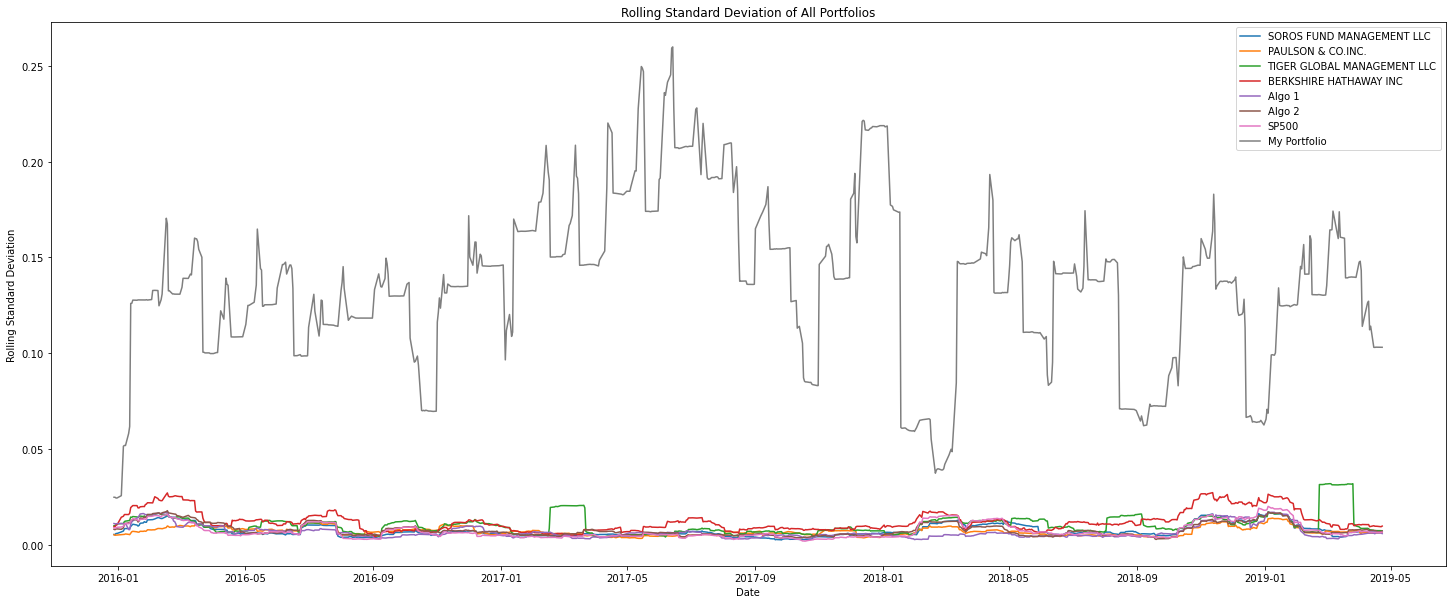

In [38]:
# Calculate rolling standard deviation
rolling_std2 = all_portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_std2.plot(title = "Rolling Standard Deviation of All Portfolios", ylabel = "Rolling Standard Deviation", figsize=(25,10))

### Calculate and plot the correlation

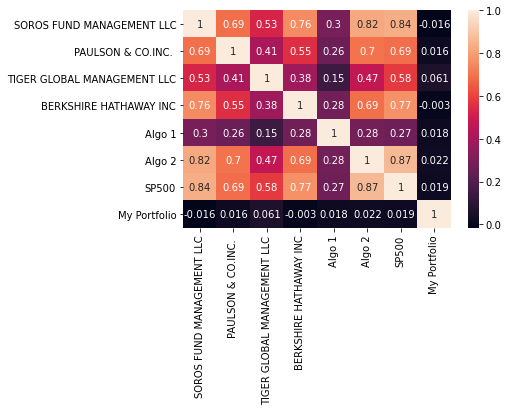

In [39]:
# Calculate and plot the correlation
correlation2 = all_portfolio_returns.corr()
sns.heatmap(correlation2, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

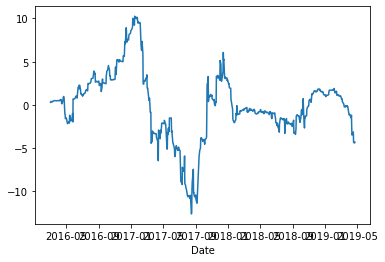

In [43]:
# Calculate and plot Beta
my_portfolio_rolling_conv = all_portfolio_returns['My Portfolio'].rolling(window = 60).cov(all_portfolio_returns['SP500'])
rolling_variance2 = all_portfolio_returns['SP500'].rolling(window = 60).var()
my_portfolio_beta = my_portfolio_rolling_conv/rolling_variance2
my_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = (all_portfolio_returns.mean() * 252)/(all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.299668
PAULSON & CO.INC.             -0.507254
TIGER GLOBAL MANAGEMENT LLC    0.065664
BERKSHIRE HATHAWAY INC         0.415031
Algo 1                         1.428811
Algo 2                         0.583240
SP500                          0.671046
My Portfolio                   1.781686
dtype: float64

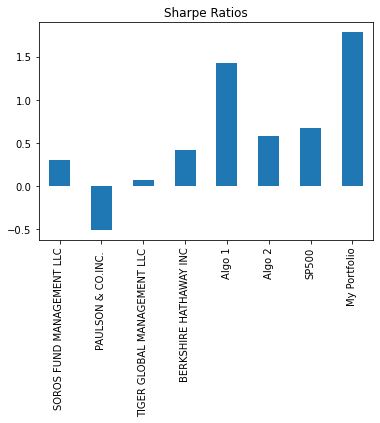

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

This portfolio outperforms the whale portfolio, the algos and SP500. The standard deviation is significatly higher than the others, so there is greater risk, but also a greater payout. Observing the sharpe ratio, this portfolio still performs better after risk has been accounted for.